## 지그재그의 데이터분석 팀에 오신 것을 환영합니다!

## *set options

In [50]:
import pandas as pd

In [51]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

**1. data 폴더의 zigzag_DB.db에 연결한 뒤 데이터베이스 스키마를 출력해주세요. 그 다음,  order 테이블을 불러와주세요.**

In [52]:
# python에서 DB를 다루는 library인 sqlite3와 데이터를 다루는 library인 padas를 import합니다.
import pandas as pd
import sqlite3

In [53]:
#Write your code here!
connect = sqlite3.connect('zigzag_DB.db')

query = '''
    SELECT *
        FROM 'order'
'''

order = pd.read_sql(query,connect)

print(order.shape)
order.head()

(867, 5)


,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


**2. order 테이블을 이용해 지그재그의 당일 매출 상위 10개 쇼핑몰을 구해주세요.**

In [54]:
#Write your code here!
table = pd.pivot_table(order, index='shop_id', values='price', aggfunc='sum')
table = table.sort_values(by='price', ascending = False)
table.head(10)

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


**3. 판매 건수를 포함하여 피벗테이블을 만들어주세요. 또한, 상위 10개 쇼핑몰의 매출을 막대그래프로 보여주세요.**

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#Write your code here!
table = pd.pivot_table(order, index='shop_id', values='price', aggfunc=['sum','count'])

table.columns = ['sum','count']

table = table.sort_values(by='sum', ascending=False)
top_tab = table.head(10)
top_tab

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


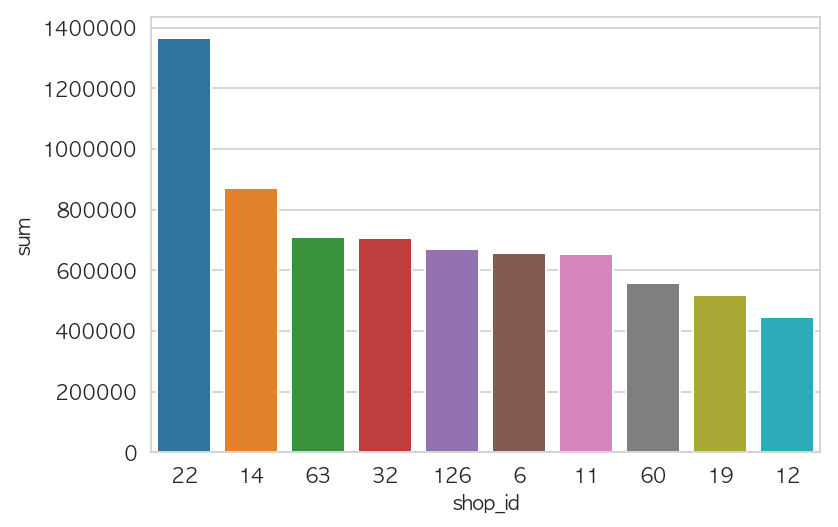

In [57]:
sns.barplot(data=top_tab, x=top_tab.index, y='sum', order=top_tab.index)

**4. 시간대별 지그재그 매출을 구하려고 합니다. lineplot을 이용하여 6월 11일의 시간대별 매출을 시각화 해주세요.**

In [58]:
import matplotlib as mpl

sns.set_style('whitegrid') #스타일은 원하는 것을 사용하세요.

mpl.rc('font', family='AppleGothic') # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

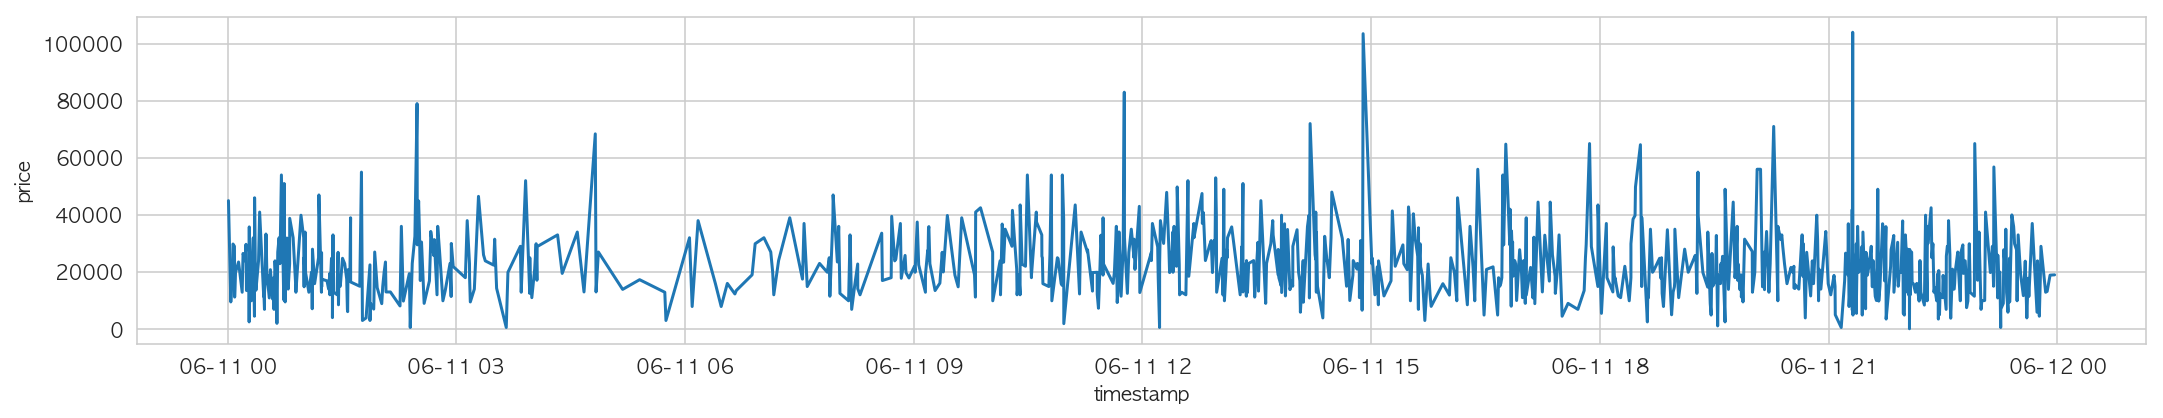

In [59]:
#Write your code here!
order['timestamp'] = pd.to_datetime(order["timestamp"])

plt.figure(figsize=(18,3))
sns.lineplot(data=order, x='timestamp', y='price')

**5. 위의 시각화를 구간화(binning) 작업을 거쳐 보기 좋은 형태로 만들어주세요.**

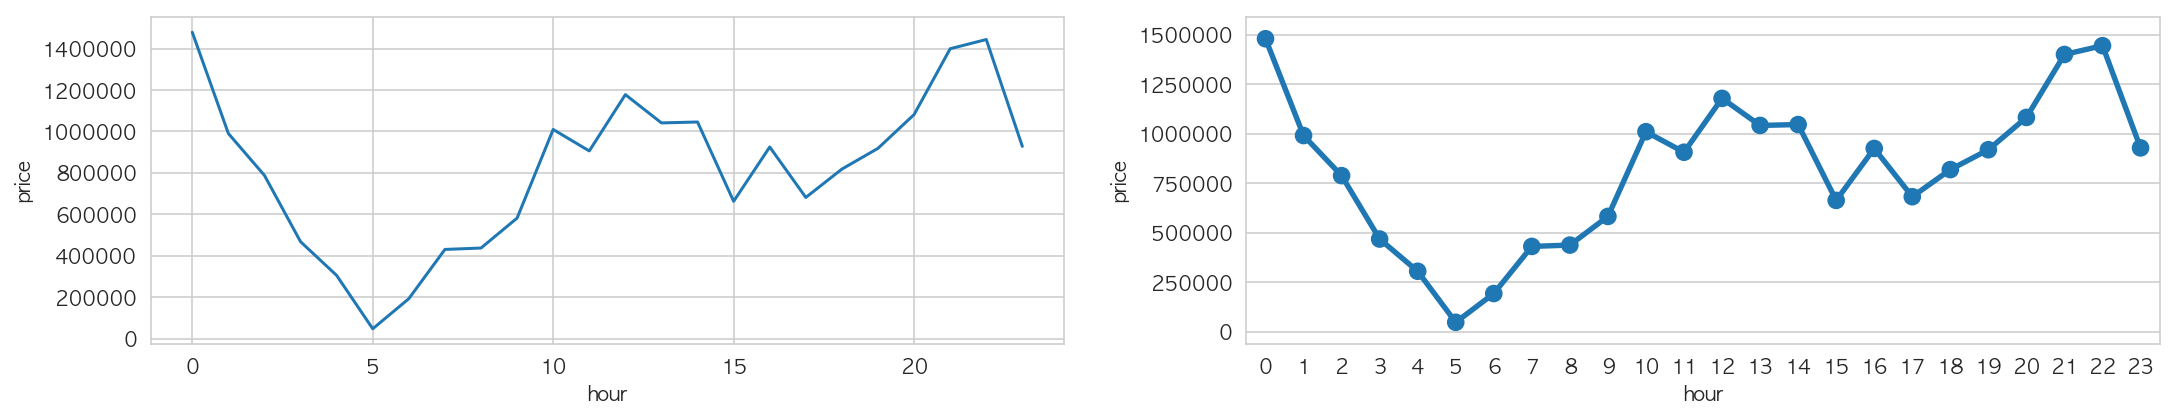

In [60]:
#Write your code here!
order['hour'] = order['timestamp'].dt.hour
hour = pd.pivot_table(order, index='hour', values='price', aggfunc='sum')

figure, (ax1, ax2) = plt.subplots(nrows=1,ncols=2)

figure.set_size_inches(18,3)

sns.lineplot(data=hour, x=hour.index, y='price',ax=ax1)
sns.pointplot(data=hour, x=hour.index, y='price',ax=ax2)

**6 . user 테이블을 불러와 order 테이블과 병합해주세요.**

In [61]:
#Write your code here!
query = '''
    SELECT *
        FROM 'user'
'''

user = pd.read_sql(query,connect)\

print(user.shape)
user.head()

(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [62]:
odr_usr = pd.merge(order, user, on='user_id')
odr_usr.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


**7. 매출 Top 10 쇼핑몰 구매자들의 연령대를 쇼핑몰별로 시각화하여 보여주세요.**

In [63]:
#Write your code here!
import numpy as np

odr_usr['age'] = odr_usr['age'].replace(-1,np.nan)
odr_usr['age'].head()

0    39.0
1    17.0
2     NaN
3    34.0
4    17.0
Name: age, dtype: float64

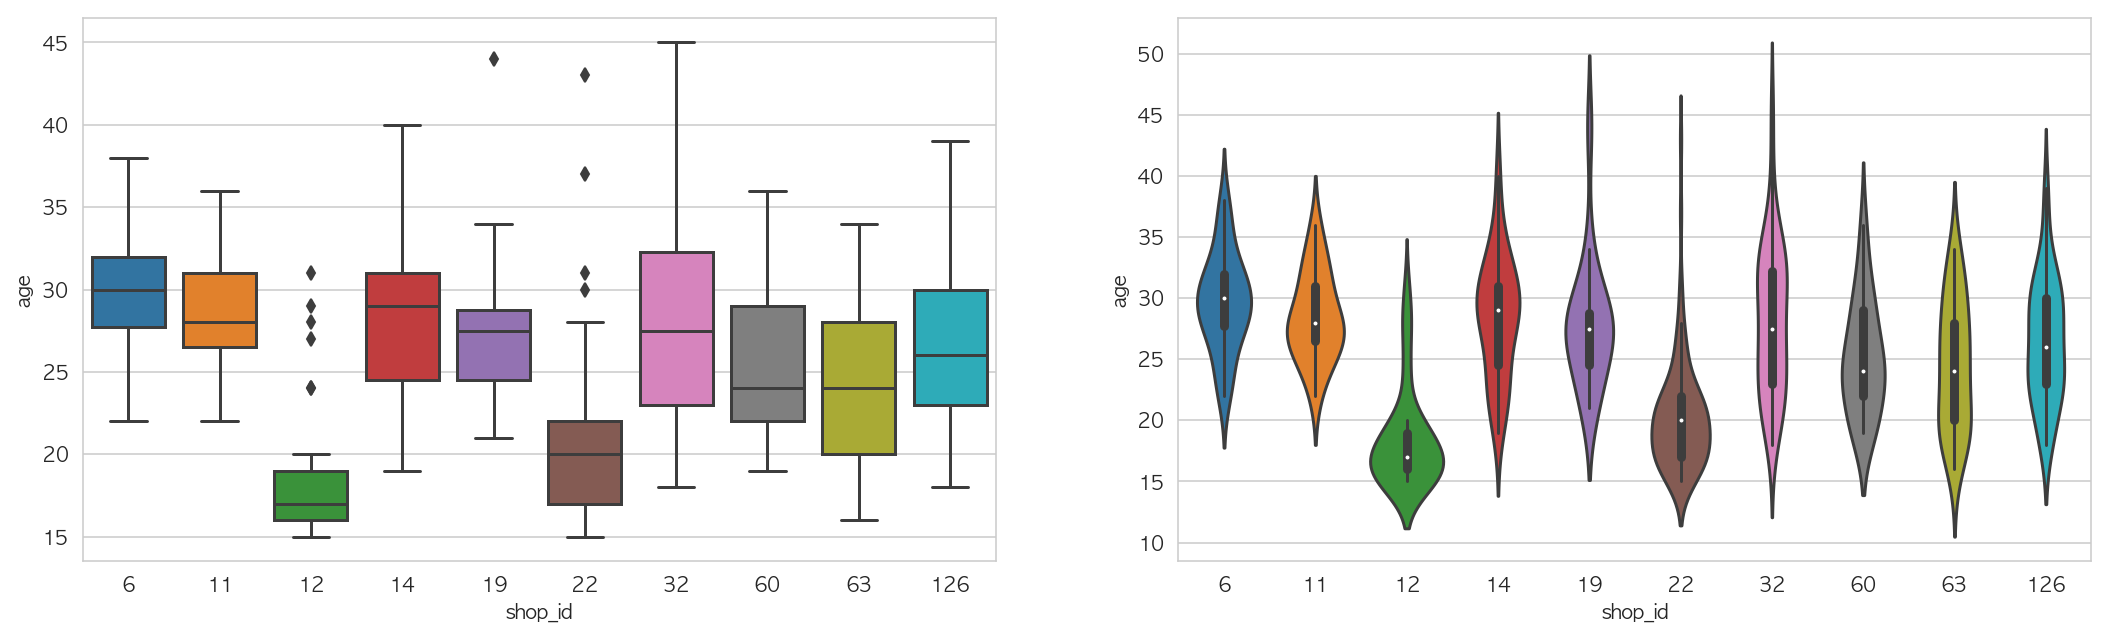

In [64]:
table = odr_usr[odr_usr['shop_id'].isin(top_tab.index)]

figure, (ax1, ax2) = plt.subplots(nrows=1,ncols=2)

figure.set_size_inches(18,5)

sns.boxplot(data=table, x='shop_id', y='age', ax=ax1)
sns.violinplot(data=table, x='shop_id', y='age', ax=ax2)

**8. user 테이블에 연령대를 나타내는 칼럼을 만들어주세요. 그리고 쇼핑몰이 설정한 타겟 연령대와 실제로 구매를 한 고객의 연령과 일치하는지를 검증해주세요.**

수행해야 할 작업은 총 3단계입니다.

    1. 실제 나이를 바탕으로 user 테이블에 연령대 칼럼을 만들기
    2. shop 테이블을 불러와 user, order 테이블과 병합하기
    3. 쇼핑몰의 타겟 연령대와 해당 쇼핑몰에서의 결제를 한 고객의 연령대를 비교하기

In [65]:
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"

    
print(make_generation(10))
print(make_generation(23))
print(make_generation(29))
print(make_generation(32))
print(make_generation(35))
print(make_generation(40))

10대
20대 중반
20대 후반
30대 초반
30대 중반
30대 후반


In [66]:
#Write your code here!
user['generation'] = user['age'].apply(make_generation)
user.head()

,user_id,os,age,generation
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41,30대 후반
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31,30대 초반
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16,10대
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41,30대 후반
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42,30대 후반


In [67]:
#Write your code here!

query='''
    SELECT *
        FROM 'shop'
'''

shop = pd.read_sql(query,connect)

print(shop.shape)
shop.head()

(200, 5)


,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [68]:
odr_usr = pd.merge(order, user, on='user_id')
odr_usr_shp = pd.merge(odr_usr, shop, on='shop_id')

print(odr_usr_shp.shape)
odr_usr_shp.head()

(867, 13)


,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,generation,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직


In [69]:
def check_generation(row):
    if row['category'] == '의류' and row['generation'] == '미입력':
        return True
    else:
        return row['generation'] in str(row['age_y'])

In [70]:
#Write your code here!

odr_usr_shp['match_generation'] = odr_usr_shp.apply(check_generation, axis=1)

table = pd.pivot_table(odr_usr_shp, index='shop_id', values='match_generation', aggfunc=['mean','count'])
table.head()

,mean,count
,match_generation,match_generation
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.400000,5
4,1.000000,1
5,0.000000,1


In [71]:
table[table.index.isin(top_tab.index)]

,mean,count
,match_generation,match_generation
shop_id,,
6,0.750000,24
11,0.684211,19
12,0.857143,42
14,0.566667,30
19,0.789474,19
22,0.929293,99
32,0.540541,37
60,0.695652,23


의류이외의 제품을 파는 쇼핑몰은 타겟 연령층이 없기 떄문에 일치여부가 0이 나옵니다. 일치여부가 낮은 쇼핑몰의 경우는 더 긴 기간의 로그를 모니터링 한 다음, 태그 수정을 제안하여 타겟 적합도를 높일 수 있습니다.

**9. 쇼핑몰의 스타일 태그를 정리해주세요.**

쇼핑몰별로 제품군의 스타일을 나타낼 수 있는 태그를 가지고 있습니다. 이 태그는 다음의 리스트에 정리되어 있습니다.

In [72]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

In [73]:
#Write your code here!
for style in style_list:
    shop[f"{style}"] = shop['style'].str.contains(style)
    
shop.head()

,shop_id,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


**10. 스타일별 실제 구매 기록을 바탕으로 가장 구매가 많이 일어난 스타일 키워드를 찾아주세요. 또한, 매출이 가장 많은 3가지 스타일의 구매 연령대 분포를 그려주세요.**


위에서 전처리한 스타일을 이용하기 위해 order, shop, user 테이블을 다시 테이블을 병합하도록 하겠습니다.

In [74]:
merged = (
    order.merge(shop, on='shop_id')
             .merge(user, on='user_id')
)
print(merged.shape)
merged.head(3)

(867, 32)


,timestamp,user_id,goods_id,shop_id,price,hour,name,category,age_x,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉,os,age_y,generation
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,iOS,39,30대 후반
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,32,30대 초반
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,37,30대 후반


In [75]:
#Write your code here!
for style in style_list:
    print(merged[f"{style}"].value_counts())

False    627
True      95
Name: 페미닌, dtype: int64
False    601
True     121
Name: 모던시크, dtype: int64
True     460
False    262
Name: 심플베이직, dtype: int64
True     371
False    351
Name: 러블리, dtype: int64
False    615
True     107
Name: 유니크, dtype: int64
False    707
True      15
Name: 미시스타일, dtype: int64
False    655
True      67
Name: 캠퍼스룩, dtype: int64
False    689
True      33
Name: 빈티지, dtype: int64
False    663
True      59
Name: 섹시글램, dtype: int64
False    717
True       5
Name: 스쿨룩, dtype: int64
False    692
True      30
Name: 로맨틱, dtype: int64
False    714
True       8
Name: 오피스룩, dtype: int64
False    720
True       2
Name: 럭셔리, dtype: int64
False    721
True       1
Name: 헐리웃스타일, dtype: int64
False    721
True       1
Name: 심플시크, dtype: int64
False    721
True       1
Name: 키치, dtype: int64
False    722
Name: 펑키, dtype: int64
False    705
True      17
Name: 큐티, dtype: int64
False    722
Name: 볼드&에스닉, dtype: int64


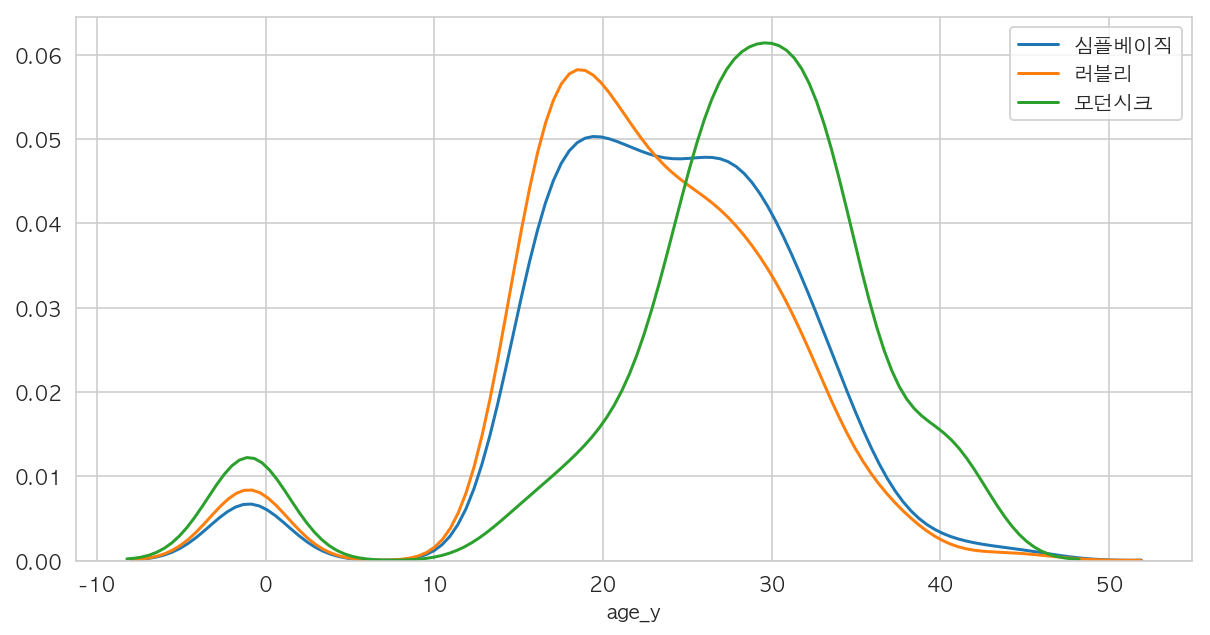

In [76]:
one = merged[merged["심플베이직"] == True]
two = merged[merged['러블리'] == True]
three = merged[merged['모던시크'] == True]

plt.figure(figsize=(10,5))

sns.distplot(one["age_y"], hist=False, label='심플베이직')
sns.distplot(two["age_y"], hist=False, label='러블리')
sns.distplot(three['age_y'], hist=False, label='모던시크')

**10. DB에서 로그 데이터를 불러온 다음 timestamp 컬럼을 datetime 형식으로 바꿔주세요. 그리고 user id를 보기 쉽게 간단한 자연수 형태로 변환해주세요.**

In [77]:
#Write your code here!
query = """
    SELECT *
        FROM 'log'
"""

log = pd.read_sql(query,connect)

print(log.shape)
print(log.dtypes)
log.head()

(105815, 6)
timestamp          object
user_id            object
event_origin       object
event_name         object
event_goods_id    float64
event_shop_id     float64
dtype: object


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


In [78]:
log['timestamp'] = pd.to_datetime(log['timestamp'])

print(log.dtypes)
log.head()

timestamp         datetime64[ns]
user_id                   object
event_origin              object
event_name                object
event_goods_id           float64
event_shop_id            float64
dtype: object


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


In [79]:
# 판다스의 unique() 기능을 이용하여 유저 아이디를 user_id라는 변수에 저장합니다.

# Write your code here!
user_id = log['user_id'].unique()
user_id

array(['K1d8_t3-QIskaSkrx32oAFu856D8JmLo',
       'lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3',
       'mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8', ...,
       'Biv6EU_P8ZydD40qCYuXkKaLp8LdHvh0',
       'tR2dBDR1GbWKfenC6aeIypAXWrhr9R9Q',
       'RJeFFB2G8EB83IJMWALnjju3r5BhJFj8'], dtype=object)

In [80]:
#새로운 user_id는 연속된 자연수들로 지정합니다. range()와 len()을 사용하여 user_id의 개수만큼의 연속된 정수를 만듭니다.
n_user_id = []
# Write your code here!
for user_index in range(len(user_id)):
    n_user_id.append(user_index)
    
n_user_id

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [81]:
#python 내장 함수인 zip()을 이용하여 기존의 id와 새로운 id를 묶습니다.
id_zip = zip(user_id, n_user_id)

#id_zip을 출력하면 아래 결과와 같이 zip object이 출력됩니다.
print(id_zip)

In [82]:
#zip()의 결과를 구체적으로 보기 위하여 list로 변환하여 print하겠습니다. 상위 5개만 출력합니다.
list(zip(user_id, n_user_id))[:5]


[('K1d8_t3-QIskaSkrx32oAFu856D8JmLo', 0),
 ('lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3', 1),
 ('mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8', 2),
 ('Yjny5AchUWLiuv4kdeq50COF-S8OFXPd', 3),
 ('LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl', 4)]

In [83]:
#새로운 id와 기존의 id가 대응된 딕셔너리 타입 변수를 생성합니다.
id_dict = dict(id_zip)

id_dict

{'K1d8_t3-QIskaSkrx32oAFu856D8JmLo': 0,
 'lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3': 1,
 'mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8': 2,
 'Yjny5AchUWLiuv4kdeq50COF-S8OFXPd': 3,
 'LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl': 4,
 'TUoAGIbbNds5cYLZLnz-R5VlkG5L8RuZ': 5,
 'B9F_BHH9F3b6MW329go9jDr71Uunx629': 6,
 'e_xrTZ9fHVodxxadLx688qUKMWCdL8bW': 7,
 'aA9S7LxnFm6ym6IUEa-4SSxJa-iL5m2J': 8,
 '1V2qyn-5WTsZm47-jPLkIR3bNPZ6IudQ': 9,
 'gAZcQyqsBDzE0GTujwQplu5LaiglC0mQ': 10,
 'hkm8GKNURA-0WHrYtto_O0ujXgPSEsW3': 11,
 'Y3X7Crifq4x6Py7OF4SRdHsRNXaxpARl': 12,
 'CFGbbyBJ2QvhxkZaFBD-qYTtKPdWbCxq': 13,
 'kAfEgmGLiFqtkx9xvW8jsP-g-qZlcZoO': 14,
 'jSKnyXhWkneewc11kGtVAziiBBcyU_rO': 15,
 'T6me3B7p0mQxU2jQSRCs_QoV6Udpleh2': 16,
 'b0YlbPxL2NMvaZMmm2mZ8OLnx7Co0sZH': 17,
 'M07jHl0eoRUs4oZgsxgVuU2D_oH7JEIO': 18,
 'htvUPLK8Qw_81Cmth31U_aEhfuedE87S': 19,
 'JHBkpkRYDODJDtlVcYVJ_JcRmj9BR_n3': 20,
 'RbNNhMsl38Cbfxl1dC4je4TWwyulhl_Q': 21,
 'FdvjFZtiumkMqEYywtsT3L7YAcFaKl_f': 22,
 'PdhsCcanvDszfAysiJzalzQRQbasWL7d': 23,
 'Qgxse0nmmfJ44SBziJr5Nx8-

In [84]:
# log, order, user에 id_idct를 mapping하여 각 데이터 프레임에 새로운 고객 id컬럼인 n_user_id를 만듭니다.


# Write your code here! (3 lines)
log['n_user_id'] = log['user_id'].map(id_dict)
order['n_user_id'] = order['user_id'].map(id_dict)
user['n_user_id'] = user['user_id'].map(id_dict)

# 결과를 확인합니다.
log[['user_id', 'n_user_id']].head()

,user_id,n_user_id
0,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,0
1,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,1
2,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,2
3,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,0
4,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,3


 **12. 주문 데이터, 로그 데이터를 concat해주세요.**

In [85]:
#주문 데이터의 첫번째 row를 출력합니다.
order.iloc[0]

timestamp          2018-06-11 00:00:43.032000
user_id      bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx
goods_id                                 1414
shop_id                                    38
price                                   45000
hour                                        0
n_user_id                                 277
Name: 0, dtype: object

In [86]:
# Write your code here!
log[log['user_id'] == 'bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx']

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
878,2018-06-11 00:06:45.357,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,277
901,2018-06-11 00:06:54.034,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,277
1062,2018-06-11 00:08:00.579,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,2048.0,46.0,277
1259,2018-06-11 00:09:38.881,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,277
1439,2018-06-11 00:11:04.446,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,3486.0,38.0,277
1473,2018-06-11 00:11:20.354,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,277
1526,2018-06-11 00:11:48.284,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,4006.0,24.0,277
2423,2018-06-11 00:18:21.906,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,277
2529,2018-06-11 00:19:01.928,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,277
2758,2018-06-11 00:20:30.432,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,shops_bookmark,app_page_view,NaN,NaN,277


00시 37분에 마지막 log가 기록되어 있습니다. 이 기록을 바탕으로 해당 고객은 쇼핑몰 즐겨찾기 목록에서 특정 쇼핑몰을 클릭하여 들어간다음 43분에 린넨바지를 구매한 것을 유추할 수 있습니다. 

logs 테이블에 존재하는 기록들은 위와 같이 기록이 되어 있습니다. 사람들이 구매를 하도록 유도하는 것이 최종 목표이기 때문에, 로그기록과 구매기록을 연결하는 것은 매우 중요합니다. 하지만, 로그 테이블에는 이 사람이 구매를 했는지에 대한 정보가 전혀 없기 때문에 order 테이블과 log 테이블을 병합해야할 필요가 있습니다. 이를 `pd.concat()` 을 이용하여 병합하도록 하겠습니다.

기록 중에, 주문을 했지만 그 전의 로그 정보가 전혀 없는 고객들이 있습니다. 시간 대를 살펴봤을 때, 이들은 전날에 로그 기록이 존재하고 6월 11일 자정 이후 결제를 한 것으로 추론됩니다. 이들은 잔존 시간을 계산하는데 오류를 일으키므로 이들을 제외하고 concat 하도록 하겠습니다.

In [87]:
# set()을 사용하여 user_id컬럼을 집합 타입으로 변환후 원소 개수를 반환하여 변수에 저장해주세요.

# 주문한 고객의 수를 user_number_order란 변수에 저장해주세요.

user_number_order = len(set(order['user_id']))

# log에 기록된 고객의 수를 user_number_log란 변수에 저장해주세요.

user_number_log = len(set(log['user_id']))

# 중복된 고객들을 user_duplicated란 변수에 저장해주세요.

user_duplicated = set(order['user_id']) & set(log['user_id'])


# 결과를 출력합니다.
print('해당 날짜에 구매한 총 고객수 입니다 :',user_number_order, end ='명\n')
print('해당 날짜 log데이터에 기록된 총 고객수입니다 :',user_number_log,  end ='명\n')
print('중복되는 고객수입니다 :', len(user_duplicated) , end ='명\n')

해당 날짜에 구매한 총 고객수 입니다 : 832명
해당 날짜 log데이터에 기록된 총 고객수입니다 : 9909명
중복되는 고객수입니다 : 742명


In [88]:
print(order.columns)
print(log.columns)

Index(['timestamp', 'user_id', 'goods_id', 'shop_id', 'price', 'hour',
       'n_user_id'],
      dtype='object')
Index(['timestamp', 'user_id', 'event_origin', 'event_name', 'event_goods_id',
       'event_shop_id', 'n_user_id'],
      dtype='object')


In [89]:
# order 원본을 변형하지 않기 위해 order을 copy하여 사용합니다. 
order_copy = order.copy()

In [90]:
# 겹치는 유저만으로 data를 indexing합니다. user_duplicated 이용합니다. 
# isin을 이용한 indexing은 뒤의 문제에서도 많이 나오기 때문에 유심히 봐두시면 유용합니다.
order_copy = order_copy[order_copy['user_id'].isin(user_duplicated)]

#  event_origin 컬럼에는 shop_id 컬럼을 저장합니다.
order_copy['event_origin'] = order_copy['shop_id']

#  event_name 컬럼에는 'purchase'를 저장합니다.
order_copy['event_name'] = 'purchase'

# event_goods_id 컬럼에는 good_id 컬럼를 저장합니다.
order_copy['event_goods_id'] = order_copy['goods_id']

# 사용할 columns를 설정합니다.
order_copy = order_copy[['timestamp', 'n_user_id', 'user_id','event_origin',
         'event_name', 'event_goods_id', 'price']]

order_copy.head()


,timestamp,n_user_id,user_id,event_origin,event_name,event_goods_id,price
0,2018-06-11 00:00:43.032,277.0,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,38,purchase,1414,45000
1,2018-06-11 00:02:33.763,444.0,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,12,purchase,1351,9500
4,2018-06-11 00:05:26.010,167.0,lq1Je3voA3a0MouSFba3629lKCvweI24,89,purchase,5572,29000
5,2018-06-11 00:05:35.182,160.0,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,22,purchase,55,11200
6,2018-06-11 00:06:14.314,113.0,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,22,purchase,2451,19800


In [91]:
# log, order_copy를 concat 해주하여 다시 log_order에 저장해주세요.

# Write your code here!

log_order = pd.concat([log,order_copy])
log_order.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id
0,NaN,app_page_view,shops_ranking,NaN,0.0,NaN,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo
1,NaN,app_page_view,shops_bookmark,NaN,1.0,NaN,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3
2,NaN,app_page_view,goods_search_result/로브,NaN,2.0,NaN,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8
3,NaN,app_page_view,shops_bookmark,NaN,0.0,NaN,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo
4,NaN,app_page_view,shops_bookmark,NaN,3.0,NaN,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd


----

In [92]:
# Write your code here!
log_order['purchase'] = log_order['price'].notnull()

log_order.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,NaN,app_page_view,shops_ranking,NaN,0.0,NaN,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
1,NaN,app_page_view,shops_bookmark,NaN,1.0,NaN,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,False
2,NaN,app_page_view,goods_search_result/로브,NaN,2.0,NaN,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,False
3,NaN,app_page_view,shops_bookmark,NaN,0.0,NaN,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
4,NaN,app_page_view,shops_bookmark,NaN,3.0,NaN,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,False


----

In [94]:
# Write your code here!
log_order = log_order.sort_values(by = ['user_id','timestamp']).reset_index()

log_order.head()

,level_0,index,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,0,52042,NaN,app_page_view,shops_bookmark,NaN,5899.0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
1,1,52185,NaN,app_page_view,shops_bookmark,NaN,5899.0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
2,2,7571,NaN,app_page_view,my_goods,NaN,1130.0,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
3,3,7589,2506.0,enter_browser,my_goods,40.0,1130.0,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
4,4,8150,NaN,app_page_view,my_goods,NaN,1130.0,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False


**13. 동일한 사용자에 대한 연속한 로그들 사이의 시간 간격을 구해주세요.**

고객별 연속한 log사이의 시간 간격을 log duration으로 정의합니다. 이는 고객의 잔존시간을 구하는 것으로 연결됩니다.

In [95]:
# 우선, timestamp 컬럼를 datetime 타입으로 변환해주세요.

# Write your code here!
log['timestamp'] = pd.to_datetime(log['timestamp'])
log.dtypes

timestamp         datetime64[ns]
user_id                   object
event_origin              object
event_name                object
event_goods_id           float64
event_shop_id            float64
n_user_id                  int64
dtype: object

----

In [96]:
# timestamp_after 컬럼을 다음과 같이 만듭니다.
log_order['timestamp_after'] = log_order.groupby(['n_user_id'])['timestamp'].shift(-1)

log_order.head()

,level_0,index,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase,timestamp_after
0,0,52042,NaN,app_page_view,shops_bookmark,NaN,5899.0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,2018-06-11 15:59:05.505
1,1,52185,NaN,app_page_view,shops_bookmark,NaN,5899.0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,NaT
2,2,7571,NaN,app_page_view,my_goods,NaN,1130.0,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 00:55:44.430
3,3,7589,2506.0,enter_browser,my_goods,40.0,1130.0,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:00:33.295
4,4,8150,NaN,app_page_view,my_goods,NaN,1130.0,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:11:03.608


----


In [97]:
# log_duration을 계산하고 nan값(마지막 로그)는 0으로 채워 log_duration 컬럼에 저장합니다.

# Write your code here!

log_order['log_duration'] = log_order['timestamp_after'] - log_order['timestamp']

log_order[['timestamp','timestamp_after','log_duration']].head()

,timestamp,timestamp_after,log_duration
0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,00:01:54.890000
1,2018-06-11 15:59:05.505,NaT,NaT
2,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,00:00:07.121000
3,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,00:04:48.865000
4,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,00:10:30.313000


----

분석의 편의를 위하여 map()과 total_seconds() 메서드를 이용하여 log_duration을 초로 환산해주세요.

마지막으로, 이 후의 계산을 위해 astype() 메서드를 이용하여 log_duration 컬럼을 float으로 변환해주세요.  

In [98]:
# Write your code here!
log_order['log_duration'] = log_order['log_duration'].dt.total_seconds()

log_order[['n_user_id','timestamp','timestamp_after','log_duration']].head()

,n_user_id,timestamp,timestamp_after,log_duration
0,5899.0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890
1,5899.0,2018-06-11 15:59:05.505,NaT,NaN
2,1130.0,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121
3,1130.0,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865
4,1130.0,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313


**14. 고객이 한 번 앱에 들어와서 활동하는 시간인 잔존시간을 구하기 위해 cycle을 정의해주세요.**

고객이 한번 app에 접속하여 나가기까지의 일련의 활동을 한 cycle이라 정의하겠습니다.

cycle을 구하기 위해서 고객이 cycle을 종료하고 앱을 나갔는지 여부(boolean)인 is_out이라는 컬럼을 만듭니다. is_out의 조건은 아래와 같이 2가지가 있습니다.

    조건 1) log_duration이 0이면 고객의 당일 마지막 log입니다.
    
    조건 2) log간 간격이 40분이상이면 고객이 한 cycle이 종료하고 다음 cycle로 돌아온 것이라고 하겠습니다.

    
   

따라서 위의 조건중 적어도 1개를 만족시키면 True되도록 is_out 컬럼을 생성해주세요. 





In [99]:
# 40분을 초로 환산해야 합니다. = 2400
# Write your code here!
def check_out(row):
    if row['log_duration'] == 0 or row['log_duration'] >= 2400:
        return True
    return False

log_order['is_out'] = log_order.apply(check_out, axis=1)
log_order[['n_user_id','timestamp','timestamp_after','log_duration','is_out']].head()

,n_user_id,timestamp,timestamp_after,log_duration,is_out
0,5899.0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,5899.0,2018-06-11 15:59:05.505,NaT,NaN,False
2,1130.0,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1130.0,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1130.0,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False


In [100]:
# Write your code here!

log_order.loc[log_order['is_out'] == True , "log_duration"] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out']].head()

,n_user_id,timestamp,timestamp_after,log_duration,is_out
0,5899.0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,5899.0,2018-06-11 15:59:05.505,NaT,NaN,False
2,1130.0,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1130.0,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1130.0,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False


----

In [101]:
log_order['cycle_idx_unique'] = (log_order['is_out']
                                 .cumsum()
                                 .shift(1)
                                 .fillna(0)
                                 .astype(int)
                                )

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out', 'cycle_idx_unique']].head(5)

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_unique
0,5899.0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0
1,5899.0,2018-06-11 15:59:05.505,NaT,NaN,False,0
2,1130.0,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,0
3,1130.0,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,0
4,1130.0,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,0


In [102]:
log_order['cycle_idx_daily'] = (log_order.groupby('n_user_id')['is_out']
                                           .cumsum()
                                           .shift(1)
                                           .fillna(0)
                                           .astype(int)
                                            )

# user마다 첫 cycle_idx_daily가 1로 되어있기 때문에 이를 0으로 바꿔줍니다.
head_index = log_order.groupby('n_user_id')['cycle_idx_daily'].head(1).index
log_order.loc[head_index, 'cycle_idx_daily'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out','cycle_idx_daily']].head(30)

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_daily
0,5899.0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0
1,5899.0,2018-06-11 15:59:05.505,NaT,NaN,False,0
2,1130.0,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,0
3,1130.0,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,0
4,1130.0,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,0
5,1130.0,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,0
6,1130.0,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,0
7,1130.0,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,0
8,1130.0,2018-06-11 01:12:28.850,NaT,NaN,False,0
9,1863.0,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False,0


**14.1) cycle별 log 수(접속별 활동 개수)**

In [103]:
cycle_log_count = (log_order
                 .groupby(['n_user_id', 'cycle_idx_daily']) 
                 .size()  # 그룹별 속한 row 수(log 수)를 반환합니다.
                 .reset_index()  # index를 초기화합니다.
                 .rename(columns = { 0 : "log_count"} )   # 컬럼이름을 log_count로 변경합니다.
                )

cycle_log_count.head(10)

,n_user_id,cycle_idx_daily,log_count
0,0.0,0,4
1,0.0,1,5
2,1.0,0,1
3,1.0,1,9
4,1.0,2,5
5,1.0,3,16
6,2.0,0,34
7,2.0,1,8
8,3.0,0,1
9,3.0,1,1


**14.2) user별 cycle당 평균 log수의 평균(고객별 접속당 평균 활동수)**

In [104]:
# Write your code here!

cycle_user_log_count = pd.pivot_table(cycle_log_count, index='n_user_id', values='log_count', aggfunc="mean")

cycle_user_log_count.head()

,log_count
n_user_id,
0.0,4.50
1.0,7.75
2.0,21.00
3.0,1.00
4.0,21.00


In [229]:
# Write your code here!
alot_cycle = cycle_log_count.groupby('n_user_id')['cycle_idx_daily'].count().sort_values(ascending=False)
alot_cycle.head()


n_user_id
8470.0    10
9315.0     9
730.0      9
7844.0     9
72.0       9
Name: cycle_idx_daily, dtype: int64

**15. 잔존시간을 구해주세요**

두가지 기준으로 잔존시간을 구할 것입니다.

    1) user별
    2) 구매 user/ 비구매 user

**15.1) user별 잔존시간을 구해주세요**



In [127]:
remaining_time_cycle = (log_order.groupby(['n_user_id', 'cycle_idx_daily'])['log_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'remaining_time'})
                       )

remaining_time_cycle.head(10)


,n_user_id,cycle_idx_daily,remaining_time
0,0.0,0,52.616
1,0.0,1,19.501
2,1.0,0,0.000
3,1.0,1,216.410
4,1.0,2,207.686
5,1.0,3,335.978
6,2.0,0,3144.824
7,2.0,1,904.971
8,3.0,0,0.000
9,3.0,1,0.000


In [131]:
# Write your code here!
user_remaining_time_cycle = (remaining_time_cycle.groupby(['n_user_id'])['remaining_time']
                             .sum()
                             .reset_index()
                             .rename(columns = {'remaining_time' : 'duration'})
                            )
                             
user_remaining_time_cycle.head()

,n_user_id,duration
0,0.0,72.117
1,1.0,760.074
2,2.0,4049.795
3,3.0,0.000
4,4.0,4570.867


잔존 시간이 0인 것들은 app에 들어와서 아무것도 안하고 나간 고객들입니다.

제외하고 계산할 수도 있습니다.

**15.2) 구매/비구매 cycle별 평균 잔존시간 구하기**

In [132]:
log_order.head()

,level_0,index,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase,timestamp_after,log_duration,is_out,cycle_idx_unique,cycle_idx_daily
0,0,52042,NaN,app_page_view,shops_bookmark,NaN,5899.0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,2018-06-11 15:59:05.505,114.890,False,0,0
1,1,52185,NaN,app_page_view,shops_bookmark,NaN,5899.0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,NaT,NaN,False,0,0
2,2,7571,NaN,app_page_view,my_goods,NaN,1130.0,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 00:55:44.430,7.121,False,0,0
3,3,7589,2506.0,enter_browser,my_goods,40.0,1130.0,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:00:33.295,288.865,False,0,0
4,4,8150,NaN,app_page_view,my_goods,NaN,1130.0,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:11:03.608,630.313,False,0,0


In [136]:
cycle_purchase = log_order[log_order['purchase'] == True]
cycle_purchase = cycle_purchase['cycle_idx_unique']
cycle_purchase.shape

(772,)

---

In [134]:
# Write your code here!
data_purchase = log_order.loc[log_order['cycle_idx_unique'].isin(cycle_purchase)]
data_npurchase = log_order.loc[~log_order['cycle_idx_unique'].isin(cycle_purchase)]

---

In [137]:
# Write your code here!
data_purchase_re = (data_purchase.groupby(['n_user_id', 'cycle_idx_daily'])['log_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'remaining_time'})
                       )

data_purchase_re.head(10)

,n_user_id,cycle_idx_daily,remaining_time
0,0.0,0,52.616
1,4.0,0,4570.867
2,5.0,3,0.000
3,6.0,2,817.731
4,7.0,5,0.000
5,12.0,0,1042.188
6,15.0,0,418.913
7,23.0,0,8130.949
8,28.0,0,500.088
9,28.0,1,1505.964


마찬가지로 비구매 cycle의 잔존시간을 구해주세요.

In [138]:
# Write your code here!
data_npurchase_re = (data_npurchase.groupby(['n_user_id', 'cycle_idx_daily'])['log_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'remaining_time'})
                       )

data_npurchase_re.head(10)

,n_user_id,cycle_idx_daily,remaining_time
0,0.0,1,19.501
1,1.0,0,0.000
2,1.0,1,216.410
3,1.0,2,207.686
4,1.0,3,335.978
5,2.0,0,3144.824
6,2.0,1,904.971
7,3.0,0,0.000
8,3.0,1,0.000
9,5.0,0,100.394


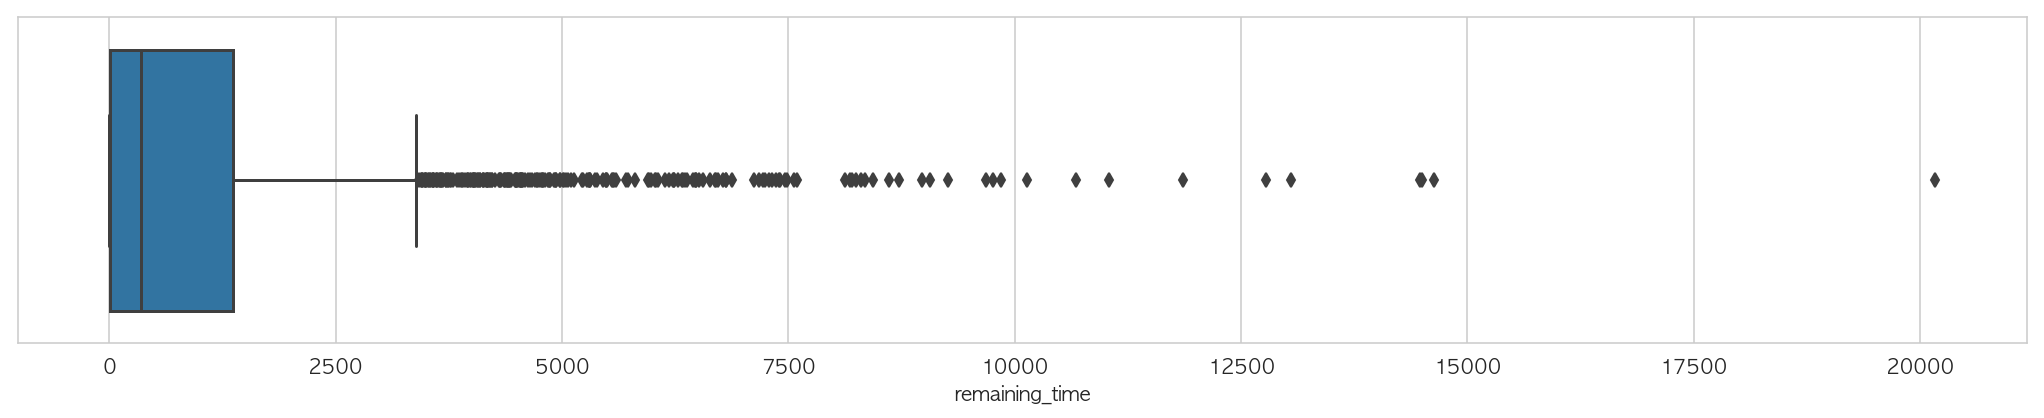

In [144]:
# Write your code here!
plt.figure(figsize=(18,3))
sns.boxplot(data=data_purchase_re ,x='remaining_time')

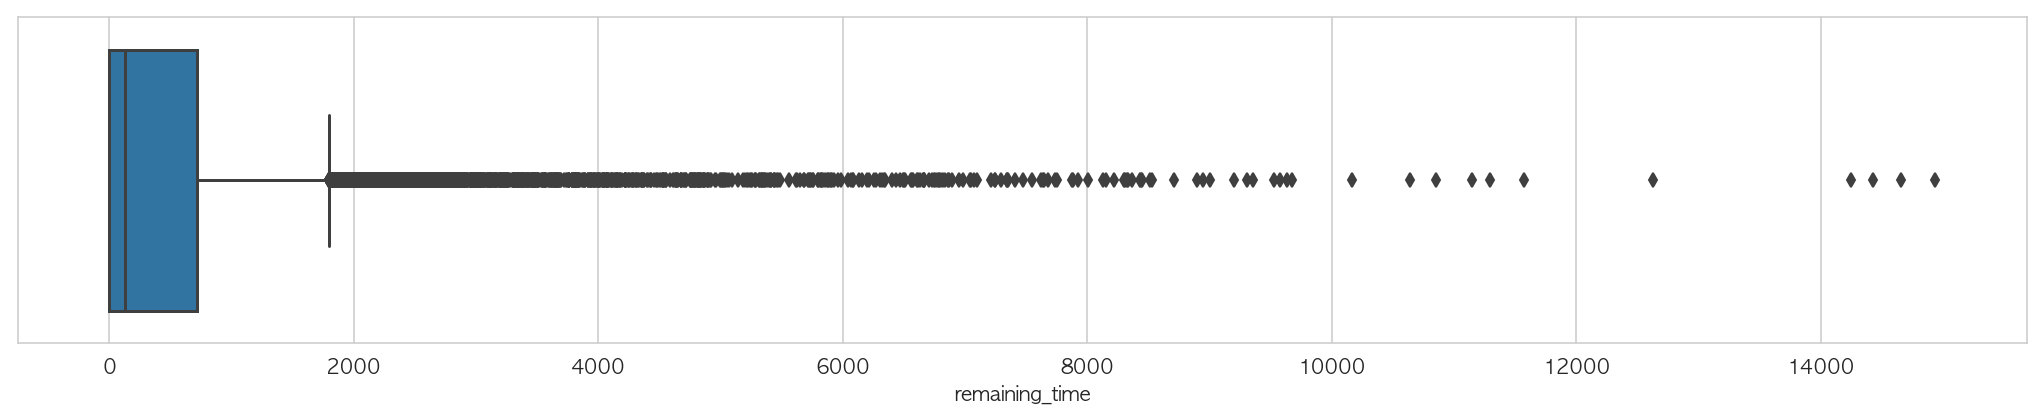

In [145]:
# Write your code here!
plt.figure(figsize=(18,3))
sns.boxplot(data=data_npurchase_re ,x='remaining_time')

In [149]:
data_purchase_re['remaining_time'].mean()

1056.6128890606847

In [150]:
data_npurchase_re['remaining_time'].mean()

618.9665064692462